In [11]:
import tensorflow as tf
import numpy as np
import os
from shapely.geometry import Polygon,Point,LineString
import pyclipper
import matplotlib.pyplot as plt
import cv2 as cv
import imgaug as ia
import imgaug.augmenters as iaa

tf.version.VERSION

'2.1.0'

In [12]:
filename = 'icdar15_raw.tfrecord'
ds = tf.data.TFRecordDataset(filename)

feature_description = {
    'img_raw':tf.io.FixedLenFeature([],tf.string,default_value=''),
    'gt':tf.io.FixedLenFeature([],tf.string,default_value='')
}

def parse_example(example):
    return tf.io.parse_single_example(example, feature_description)

def parse_tensor(item):
    img_raw = item.get('img_raw')
    gt = item.get('gt')
    img_raw = tf.io.parse_tensor(img_raw, tf.string)
    img = tf.io.decode_jpeg(img_raw)
    gt = tf.io.parse_tensor(gt, tf.string)
    return (img, gt)

ds = ds.map(parse_example)
ds = ds.map(parse_tensor)

for item in ds.take(1):
    print(item[0].shape, item[1].shape)

(720, 1280, 3) (7, 9)


In [13]:
image_size = 640
img,gt = next(ds.take(1).as_numpy_iterator())
gt = gt[:,:8]
gt = gt.reshape((-1,4,2))
gt.shape


(7, 4, 2)

<Figure size 1080x1080 with 0 Axes>

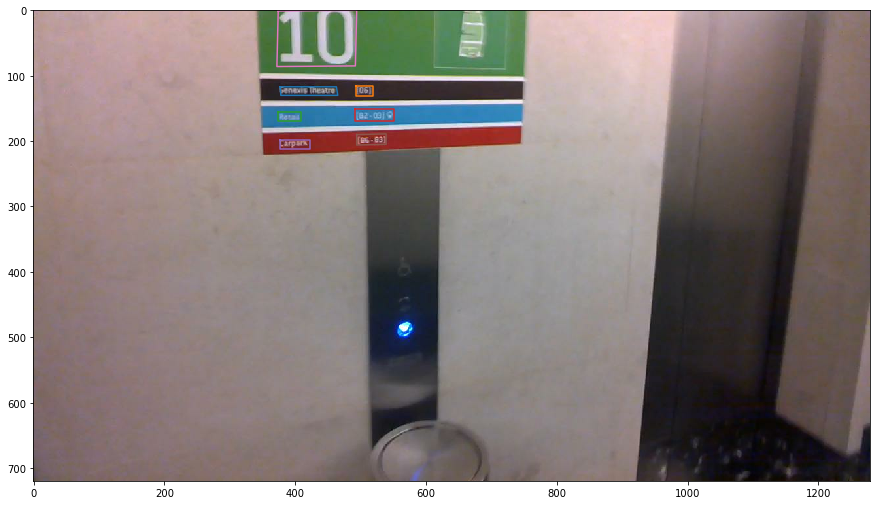

In [14]:
plt.figure(figsize=(15,15))
for i in range(gt.shape[0]):
    polygon = Polygon(gt[i])
    x,y = polygon.exterior.xy
    _ = plt.plot(x,y)

plt.imshow(img)